In [1]:
# -*- coding: utf-8 -*-
from pyhive import hive

HOST = "192.168.12.5"
PORT = 10000
NAME = "root"
PASSWORD = "5606603"
DATABASE="behavior_labels"
conn = hive.Connection(host=HOST, port=PORT, username=NAME, password=PASSWORD, auth="LDAP", database=DATABASE)

cursor = conn.cursor()
sql = "SELECT  score, center FROM dw_vip_results where subject = 2"
cursor.execute(sql)
data=[]
for result in cursor.fetchall():
    data.append(result)
    
    
import pandas as pd
data=pd.DataFrame(data)  
data.columns=["score", "center"]
data

,score,center
0,1.45,0
1,2.48,2
2,1.15,3
3,1.30,0
4,2.48,2
5,3.97,1
6,2.19,2
7,1.22,3
8,2.71,2
9,3.97,1


In [7]:
data.describe()

,score,center
count,962970.000000,962970.000000
mean,2.114297,1.405213
std,1.107011,1.180224
min,1.000000,0.000000
25%,1.150000,0.000000
50%,1.450000,1.000000
75%,2.710000,3.000000
max,50.500000,4.000000


In [2]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(data[["score"]],data["center"])
clf.predict(data[["score"]])

/usr/local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/site-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, \
/usr/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:169: R

array([0, 2, 3, ..., 3, 3, 3])

In [3]:
from sklearn.tree import export_graphviz
import pydotplus

with open("/home/messi/graphviz/Behavior2Tree.dot", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("/home/messi/graphviz/Behavior2Tree.pdf")

True

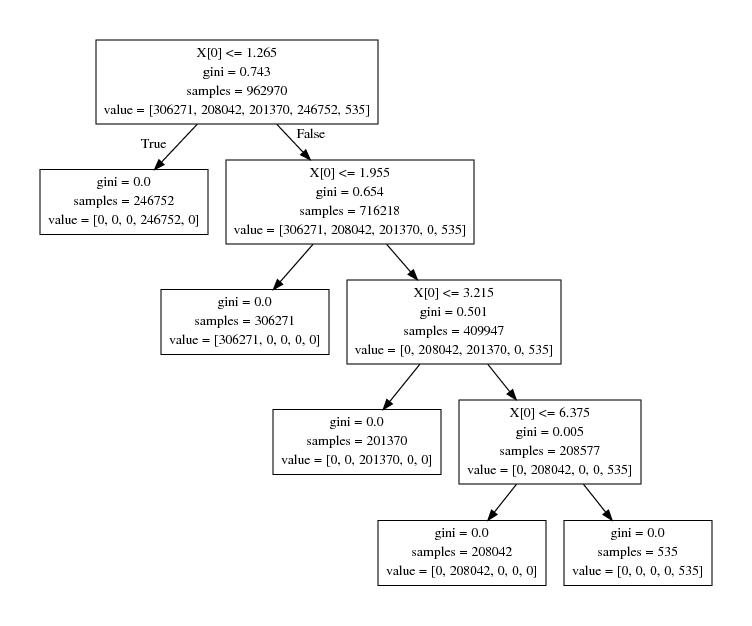

In [6]:
from wand.image import Image as WImage
img = WImage(filename="/home/messi/graphviz/Behavior2Tree.pdf")
img